#Memuat Data

In [1]:
# upload kaggle.json
from google.colab import files
files.upload()
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

Saving kaggle.json to kaggle.json
kaggle.json
100% 177M/178M [00:01<00:00, 137MB/s]
100% 178M/178M [00:01<00:00, 104MB/s]


In [2]:
!unzip "/content/online-payment-fraud-detection.zip" -d "/content/"

Archive:  /content/online-payment-fraud-detection.zip
  inflating: /content/onlinefraud.csv  


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = pd.read_csv('onlinefraud.csv')

#Exploratory Data Analysis

##Deskripsi Variabel

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
dataset.shape

(6362620, 11)

In [ ]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#Penanganan *Missing Value*

In [ ]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
dataset.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#Univariate Analysis

In [ ]:
numerical_features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
categorical_features = ['type', 'nameOrig', 'nameDest']

In [ ]:
dataset.type.unique()

array(['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

          jumlah sampel  persentase
CASH_OUT        2237500        35.2
PAYMENT         2151495        33.8
CASH_IN         1399284        22.0
TRANSFER         532909         8.4
DEBIT             41432         0.7


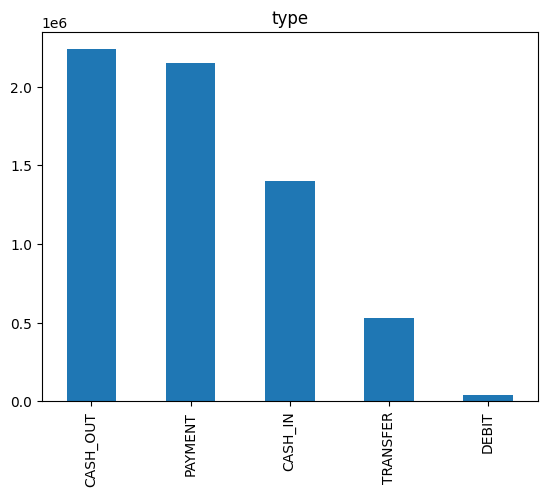

In [ ]:
feature = categorical_features[0]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [ ]:
dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
ct = pd.crosstab(dataset['type'], dataset['isFraud'])
ct

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [ ]:
ctf = pd.crosstab(dataset['type'], dataset['isFlaggedFraud'])
ctf

isFlaggedFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2237500,0
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,532893,16


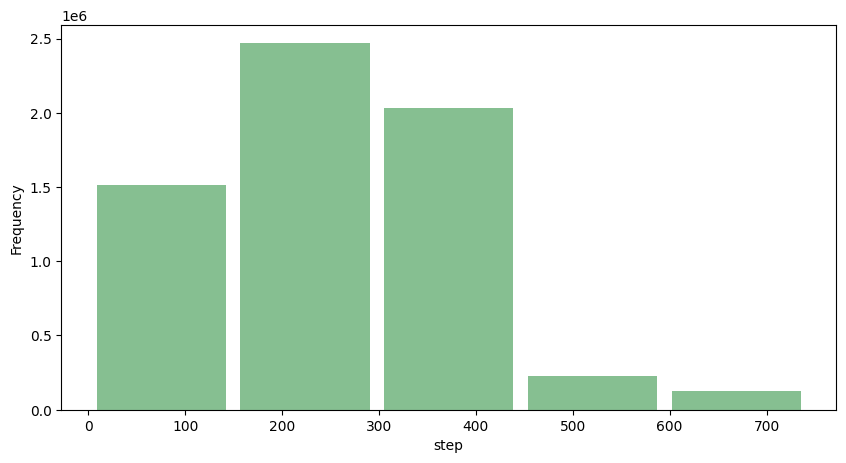

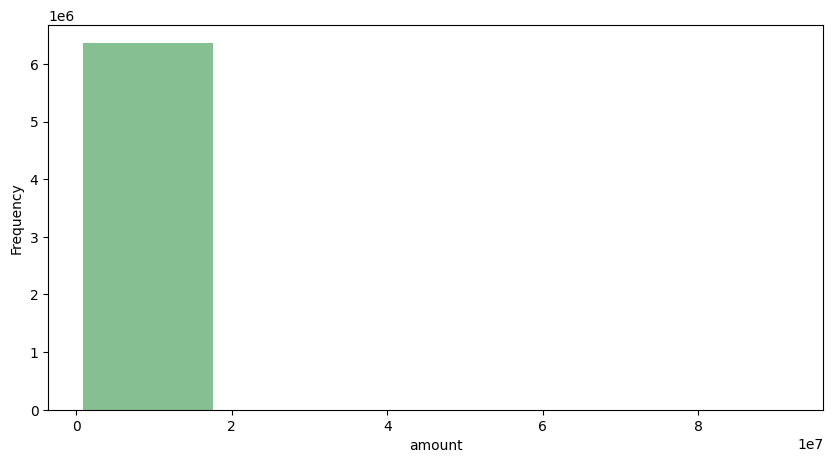

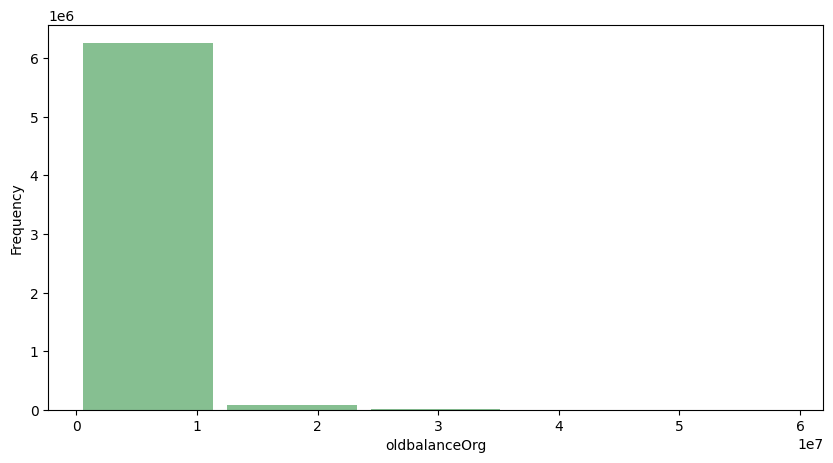

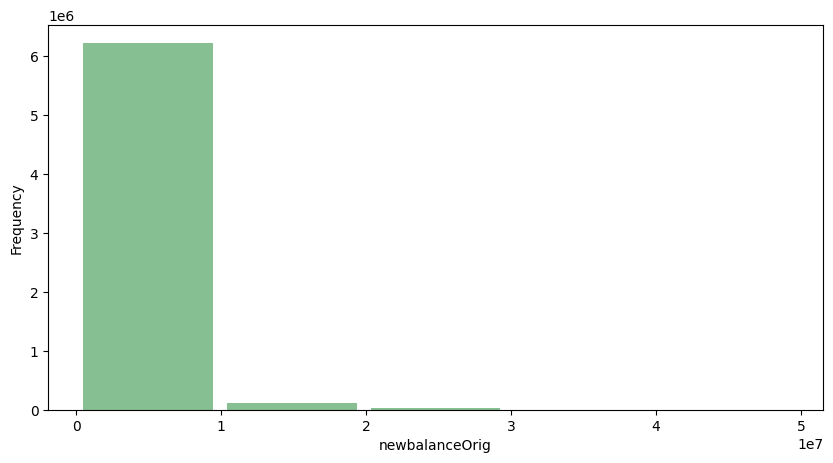

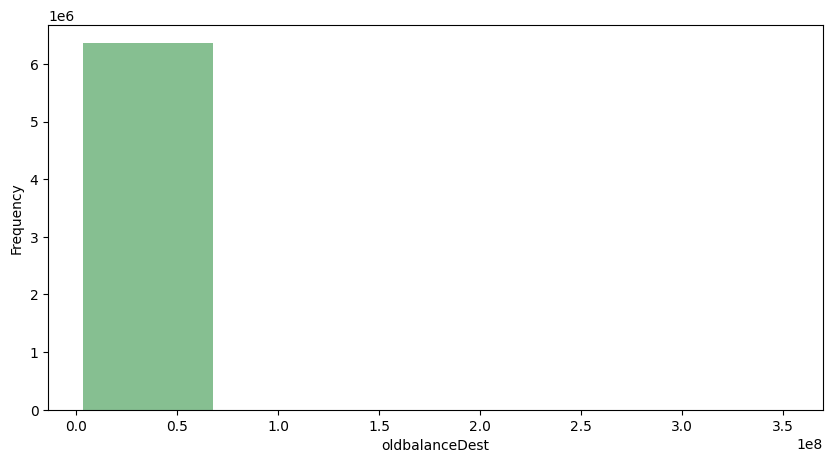

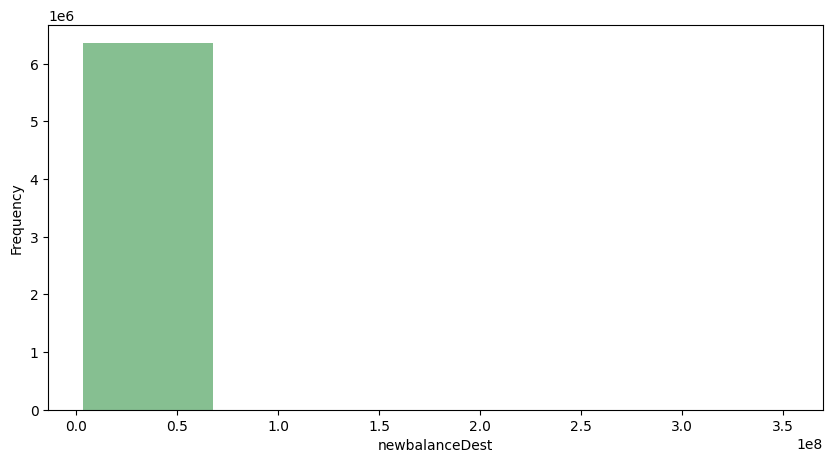

In [ ]:
for i in numerical_features:
    plt.xlabel(i)
    dataset[i].plot(kind='hist', bins=5, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9)
    plt.show()

##Multivariate Analysis

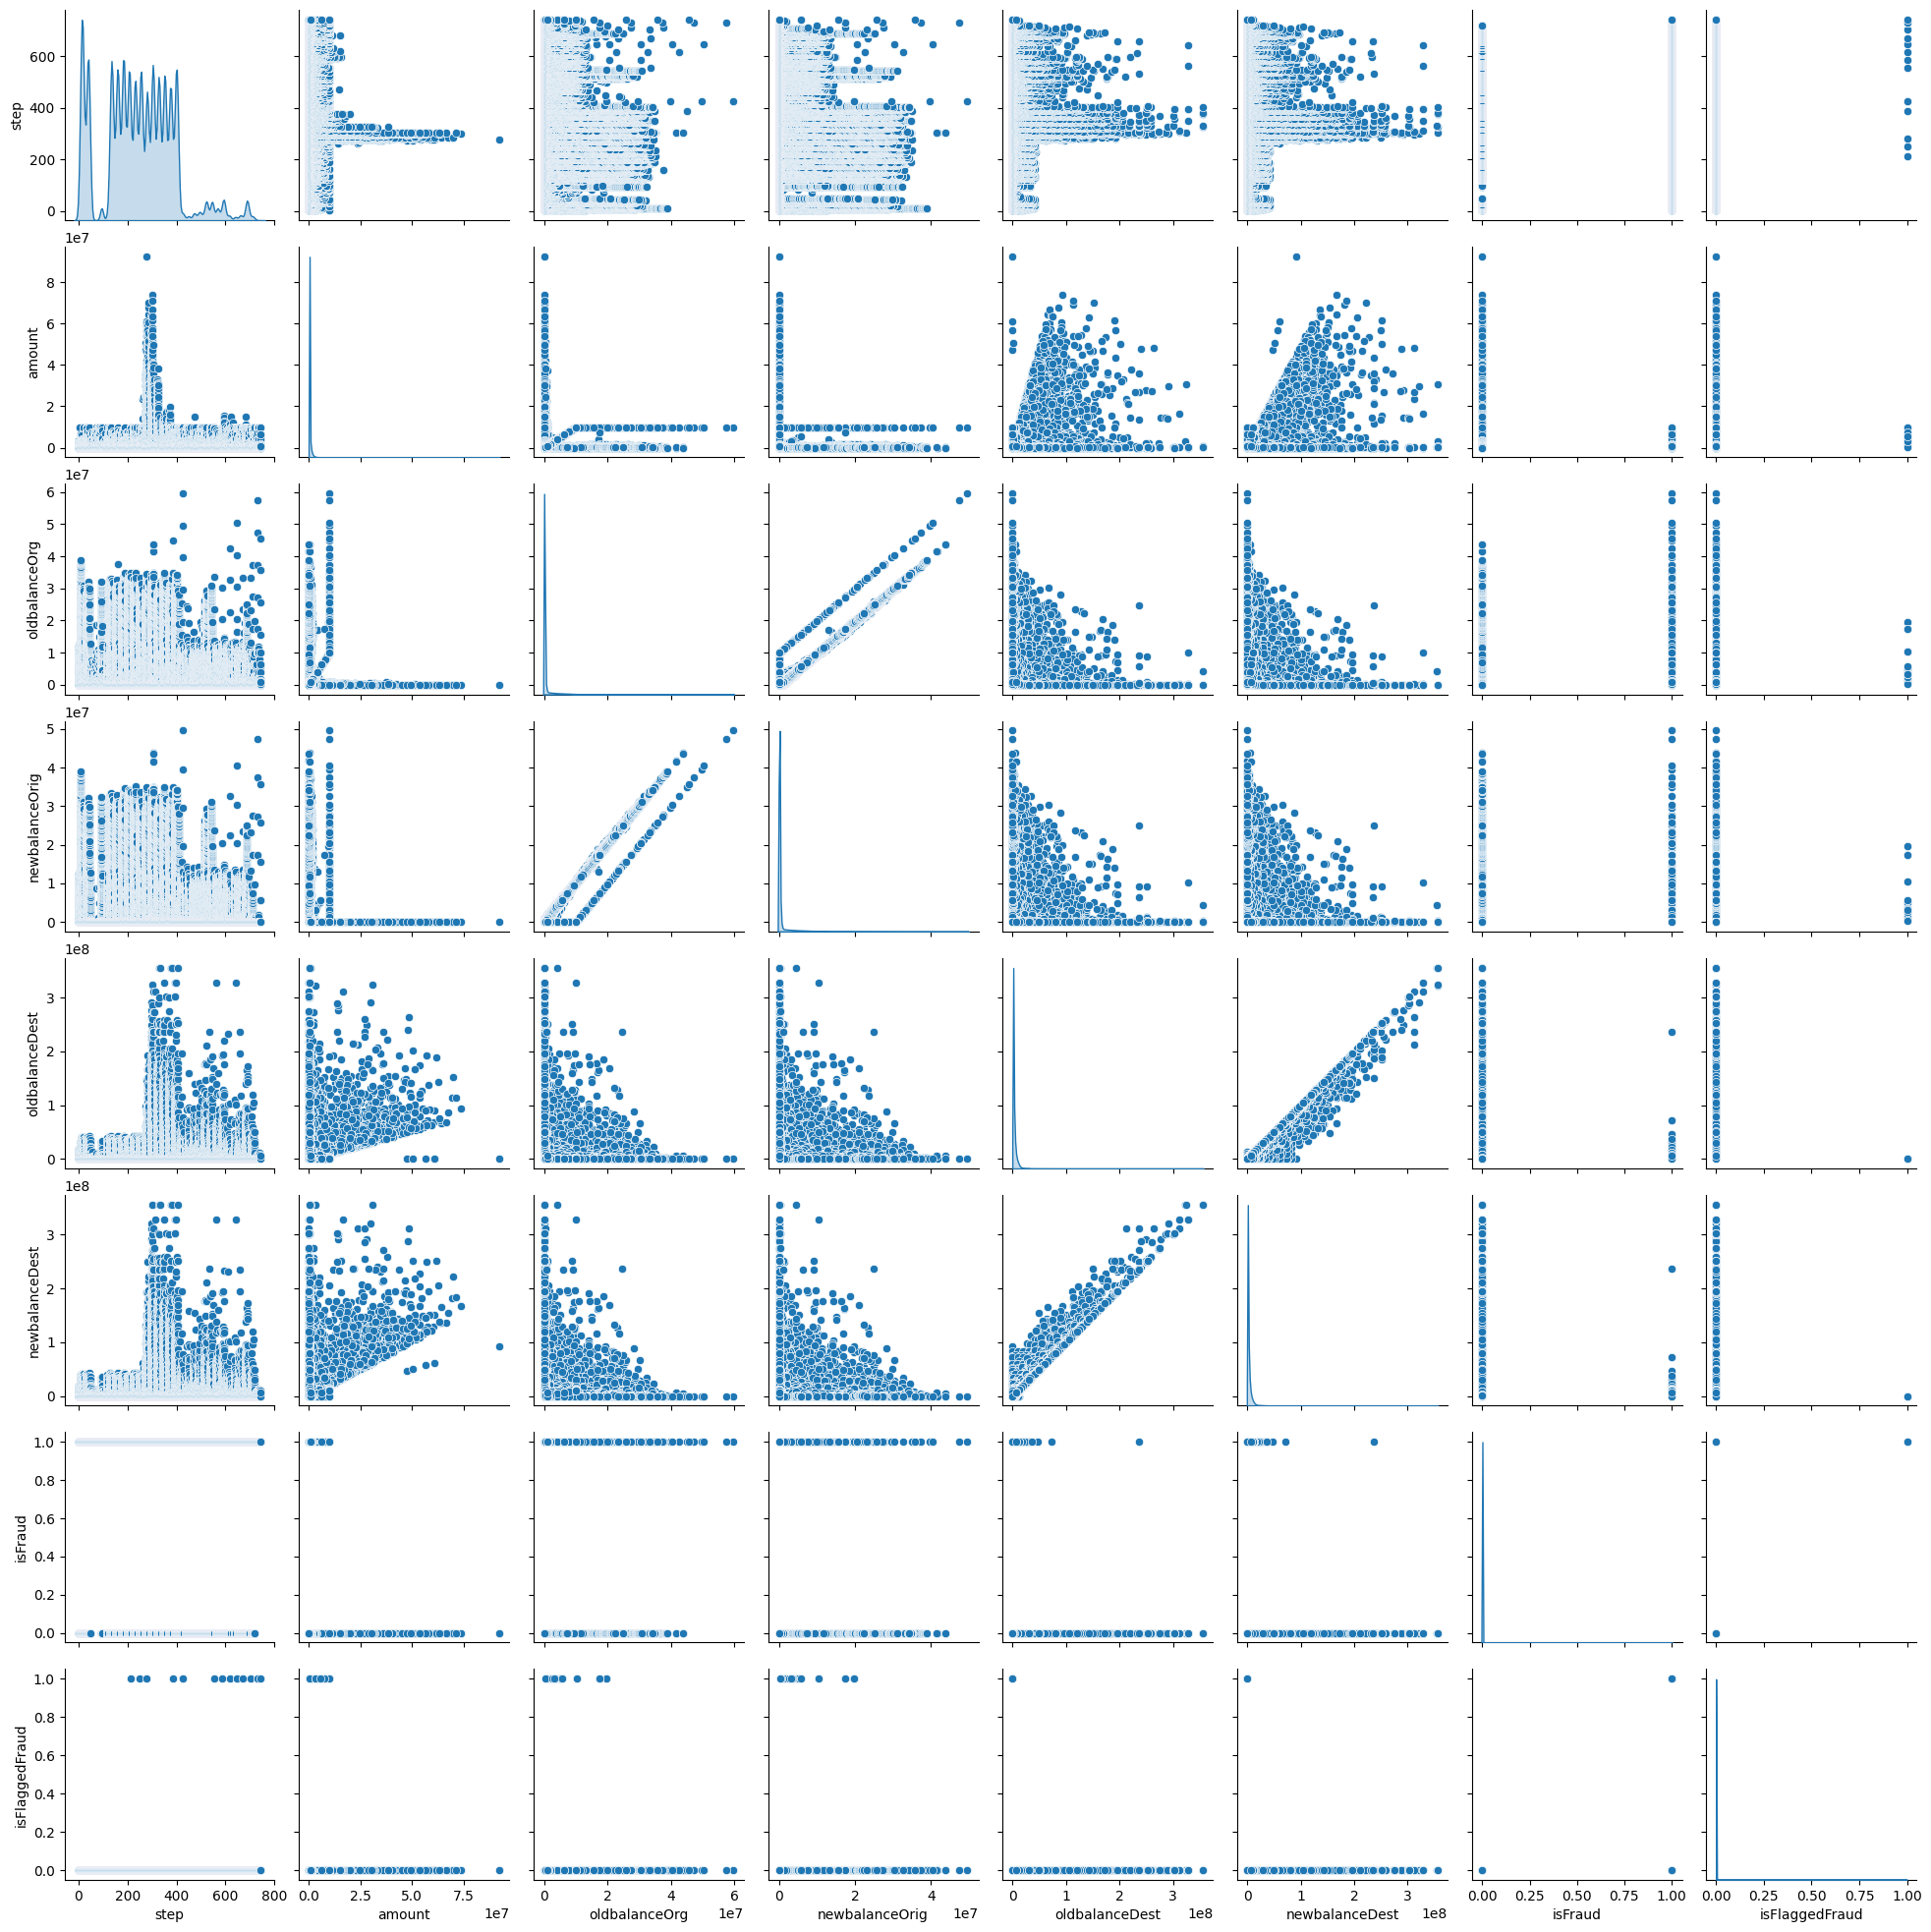

In [ ]:
sns.pairplot(dataset, diag_kind = 'kde')

<ipython-input-5-21ff13a2d038>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

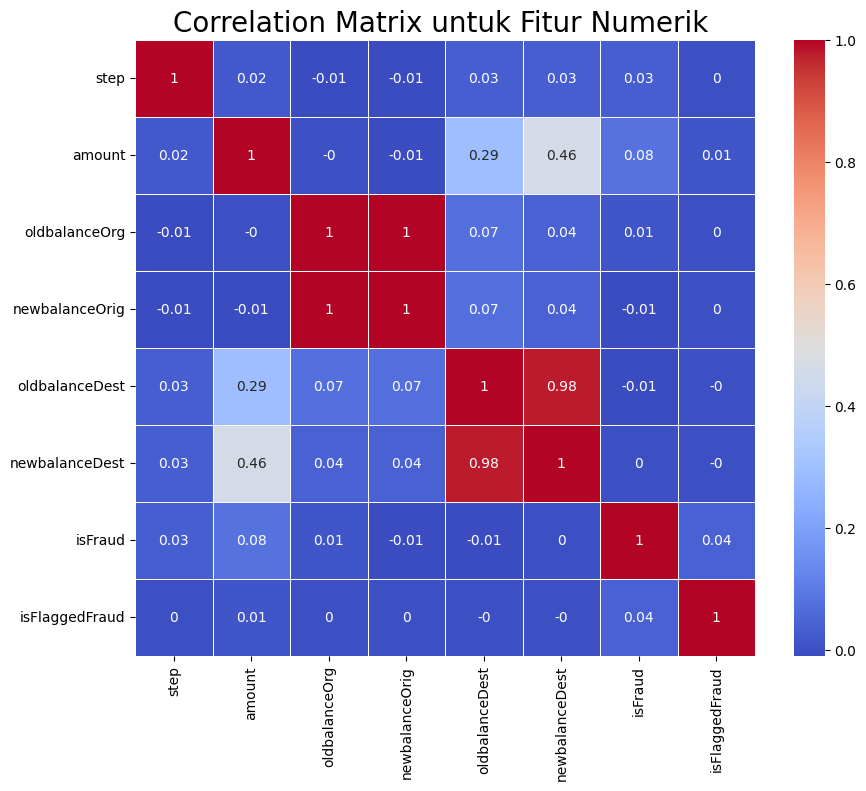

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

##Data Preparation


In [5]:
dic = {'PAYMENT': 1, 'TRANSFER':2, "CASH_OUT":3, "DEBIT":4, "CASH_IN":5}
dataset["type"] = dataset["type"].map(dic)

In [6]:
X = dataset.drop(columns=['nameOrig', 'nameDest','isFraud', 'isFlaggedFraud'])
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,2,181.00,181.0,0.00,0.0,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

Y = dataset['isFraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [8]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4453834, 7), (1908786, 7), (4453834,), (1908786,))

#Model Building

In [9]:
models = pd.DataFrame(index=['train_acc', 'test_acc'],
                      columns=['RandomForest', 'LogisticRegression', 'XGBoost'])

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

##Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0, max_depth=6)
RF.fit(X_train, Y_train)

RF_Pred = RF.predict(X_test)

In [13]:
models.loc['train_acc','RandomForest'] = accuracy_score(Y_test, RF_Pred)*100

##Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegressionCV

LR = LogisticRegressionCV(cv=5, max_iter=500, random_state=0)
LR.fit(X_train, Y_train)

LR_Pred = LR.predict(X_test)

In [15]:
models.loc['train_acc','LogisticRegression'] = accuracy_score(Y_test, LR_Pred)*100

##XGBoost

In [16]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

XGB_Pred = XGB.predict(X_test)

In [17]:
models.loc['train_acc','XGBoost'] = accuracy_score(Y_test, XGB_Pred)*100

#Model Evaluation

In [18]:
import xgboost
acc = pd.DataFrame(columns=['train', 'test'], index=['RandomForest', 'LogisticRegression', 'XGBoost'])

model_dict = {'RandomForest': RF, 'LogisticRegression': LR, 'XGBoost': XGB}

for name, model in model_dict.items():
    acc.loc[name, 'train'] = accuracy_score(y_true=Y_train, y_pred=model.predict(X_train))*100
    acc.loc[name, 'test'] = accuracy_score(y_true=Y_test, y_pred=model.predict(X_test))*100

acc

,train,test
RandomForest,99.931452,99.931318
LogisticRegression,99.825252,99.822295
XGBoost,99.987718,99.980197


##Random Forest Evaluation

Text(0.5, 23.52222222222222, 'Predicted label')

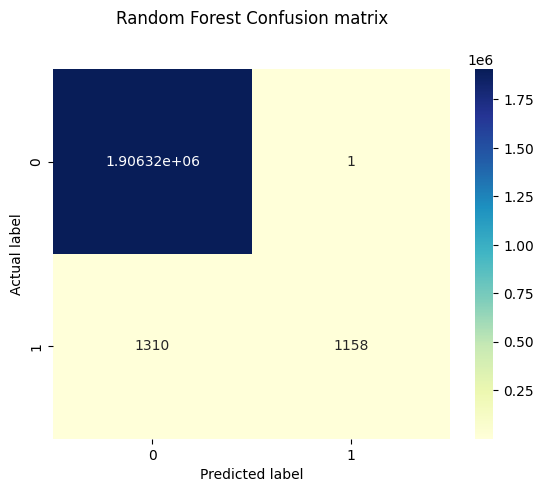

In [19]:
RF_ConfusionMatrix = confusion_matrix(Y_test, RF_Pred)
p = sns.heatmap(pd.DataFrame(RF_ConfusionMatrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Classification Report')
print(classification_report(Y_test, RF_Pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       1.00      0.47      0.64      2468

    accuracy                           1.00   1908786
   macro avg       1.00      0.73      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



##Logistic Regression Evaluation

Text(0.5, 23.52222222222222, 'Predicted label')

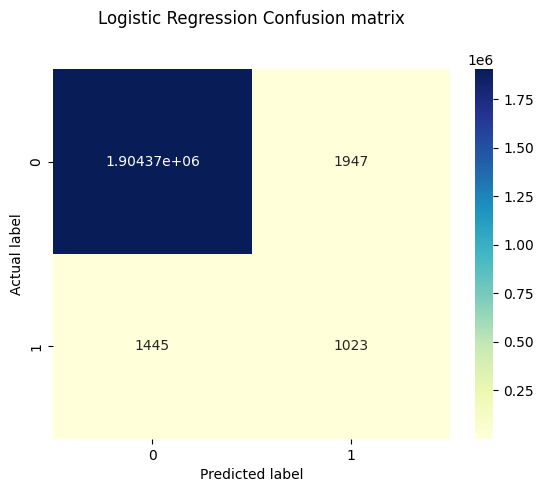

In [20]:
LR_ConfusionMatrix = confusion_matrix(Y_test, LR_Pred)
p = sns.heatmap(pd.DataFrame(LR_ConfusionMatrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Classification Report')
print(classification_report(Y_test, LR_Pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.34      0.41      0.38      2468

    accuracy                           1.00   1908786
   macro avg       0.67      0.71      0.69   1908786
weighted avg       1.00      1.00      1.00   1908786



##XGBoost Evaluation

Text(0.5, 23.52222222222222, 'Predicted label')

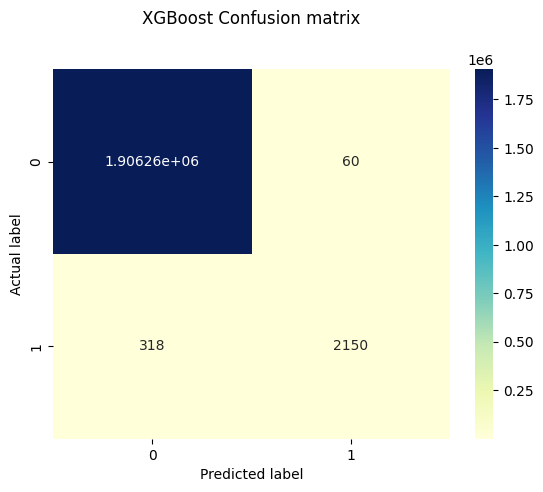

In [21]:
XGB_ConfusionMatrix = confusion_matrix(Y_test, XGB_Pred)
p = sns.heatmap(pd.DataFrame(XGB_ConfusionMatrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('XGBoost Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Classification Report')
print(classification_report(Y_test, XGB_Pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.97      0.87      0.92      2468

    accuracy                           1.00   1908786
   macro avg       0.99      0.94      0.96   1908786
weighted avg       1.00      1.00      1.00   1908786

